In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, END,START

In [2]:
class AgentState(TypedDict):
    number1: int
    operator: str
    number2: int
    finalAnswer: int

def addition_node(state:AgentState) -> AgentState:
    """This node adds two number"""
    state["finalAnswer"] = state["number1"] + state["number2"]
    return state
def multiplication_node(state:AgentState) -> AgentState:
    """This nodes multiplies two number"""
    state["finalAnswer"] = state["number1"] * state["number2"]
    return state

def decide_next_node(state:AgentState) -> str:
    """This node will select the next node of the graph"""
    # A very important point to notice over here is that the decision node will return the edges not the nodes. 
    if state["operator"] == "+":
        return "addition_operation"
    else:
        return "multiplication_operation"

In [4]:
graph = StateGraph(AgentState)
graph.add_node("addition_node",addition_node)
graph.add_node("multiplication_node",multiplication_node)
graph.add_node("router",lambda state:state)
graph.add_edge(START,"router")
graph.add_edge("addition_node",END)
graph.add_edge("multiplication_node",END)
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #here it takes the name of EDGE Name: NODE name and the EDGE names are defined in the decide_next_node function
        "addition_operation":"addition_node",
        "multiplication_operation":"multiplication_node"
        
    }
)
app = graph.compile()

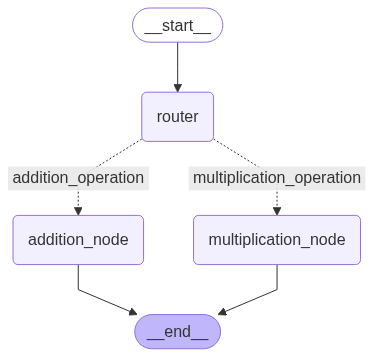

In [5]:
app

In [7]:
initial_state_1 = AgentState(number1 = 10, operator="+", number2 = 5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operator': '+', 'number2': 5, 'finalAnswer': 15}
